#El ejercicio n° 2 pide Realizar una ingesta de datos de un archivo formato .csv utilizando la librería de Pandas
Para este apartado, deberás poder ingestar un archivo en Jupyter Notebook en un formato de tipo .csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
dataset= pd.read_csv("/content/drive/MyDrive/inmuebles_bogota.csv",sep=",")

In [ ]:
#muestro los primeros cinco registros
dataset.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
#muestro los ultimos 5 registros
dataset.tail()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000
9519,Apartamento,Apartamento en venta en Tintala,3,1,52,Tintala,Tintala,$ 144.990.000


In [ ]:
#Muestro un informe con el nombre de las columnas, la cantidad de registros que tiene cada una y el tipo de datos que contienen
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [ ]:
#muestro la cantidad de registros y de  columnas
dataset.shape

(9520, 8)

In [ ]:
#cambio nombre de columnas por que en programacion es una mala practica que tengan caracteres especiales
cambio_columnas= {"Baños":"Banios","Área":"Area"}
dataset= dataset.rename(columns=cambio_columnas)

In [ ]:
#corroboro el dataset mostrando tres ejemplos aleatorios
dataset.sample(3)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor
3181,Apartamento,Apartamento en venta en Usaquén,2,4,116,Usaquén,Usaquén,$ 900.000.000
7279,Apartamento,Apartamento en venta en Usaquén,3,2,61,Usaquén,Usaquén,$ 257.000.000
8018,Apartamento,Apartamento en venta en Ciudad Bolívar,3,2,56,Ciudad Bolívar,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...,$ 185.000.000


In [ ]:
#ordeno los datos por mayor valor de venta

dataset=dataset.sort_values('Valor', ascending= True)
dataset.head(2)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor
4162,Apartamento,Apartamento en venta en Usaquén,3,3,170,Usaquén,Usaquén,$ 1.000.000.000
6044,Apartamento,Apartamento en venta en Los Rosales,3,3,198,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,$ 1.000.000.000


In [ ]:
#Muestro los diez barrios con más propiedades a la venta
dataset['Barrio'].value_counts().head(10)

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
Barrios Unidos         473
Engativa               462
Suba                   443
Santa Barbara          438
Chapinero              332
Name: Barrio, dtype: int64

<Axes: >

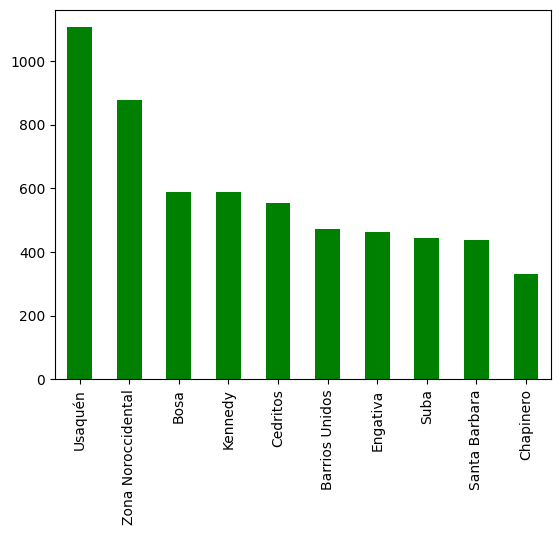

In [ ]:
#muesro en un grafico de barras los diez barrios con más propiedades a la venta
dataset['Barrio'].value_counts().head(10).plot(kind='bar',color='green')

In [ ]:
#muestro la cantidad de cada tipo de inmuebles a la venta
dataset.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

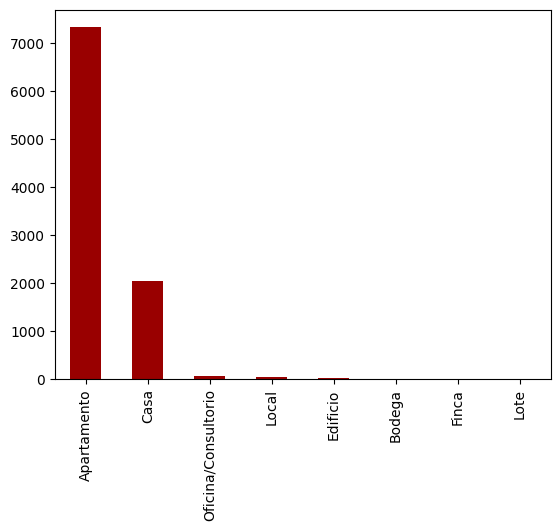

In [ ]:
#muestro la cantidad de cada tipo de inmuebles a la venta en grafico de barras
dataset['Tipo'].value_counts().head(10).plot(kind='bar',color="#900");

In [ ]:
#Elimino el signo $ y el punto del precio indicado en los campos de las filas de valor para luego poder convertir el tipo de datos a float

dataset['Valor']=dataset.Valor.str.replace('$',"",regex=True)
dataset['Valor']=dataset.Valor.str.replace('.',"",regex=True)

In [ ]:
#elimino el espacio en blanco que quedo al principio de los numeros y al final
dataset.Valor.str.lstrip()
dataset.Valor.str.rstrip()

4162     1000000000
6044     1000000000
6491     1000000000
3977     1000000000
4793     1000000000
           ...     
3581      996000000
4807      998000000
4893      998000000
2470      998000000
8302      999000000
Name: Valor, Length: 9520, dtype: object

In [ ]:
#creo nueva columna con el tipo de datos float y simplifico los numeros
dataset['Precio_Millon'] = dataset.Valor.astype('float')/1000000

#elimino columna valor ya que la sustitui por el precio_millon
dataset= dataset.drop(columns="Valor")

In [ ]:
dataset.sample(3)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Precio_Millon
1511,Apartamento,Apartamento en venta en Las Nieves,1,2,49,Las Nieves,SANTA FE: Las Nieves + Sagrado Corazón,180.0
4930,Casa,Casa en venta en Antonio Nariño,5,4,364,Antonio Nariño,Restrepo,750.0
2998,Casa,Casa en venta en Usaquén,3,3,201,Usaquén,Usaquén,980.0


In [ ]:
#Agrupo el tipo de inmuebles para luego mostrar una descripcion de la columna precio_millon
dataset.groupby('Tipo').Precio_Millon.describe()

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
Apartamento,7327.0,519.139558,598.948255,79.000000,236.500000,380.000000,559.9735,13200.000
Bodega,13.0,908.000000,793.592255,120.000000,164.000000,980.000000,1200.0000,2800.000
Casa,2043.0,827.051833,781.411835,85.000000,330.000000,620.000000,997.0000,8800.000
Edificio,22.0,3078.227273,3663.338523,700.000000,1387.500000,1700.000000,2375.0000,16000.000
Finca,11.0,2410.711343,1580.028171,939.275008,969.637504,2849.999872,3000.0000,5000.000
Local,38.0,1768.486822,1500.847417,94.500000,749.000000,1325.000000,2000.0000,5800.000
Lote,6.0,1263.333333,673.518126,420.000000,950.000000,1025.000000,1835.0000,2080.000
Oficina/Consultorio,60.0,956.764117,1034.543362,60.000000,308.750000,700.000000,1312.5000,6720.791


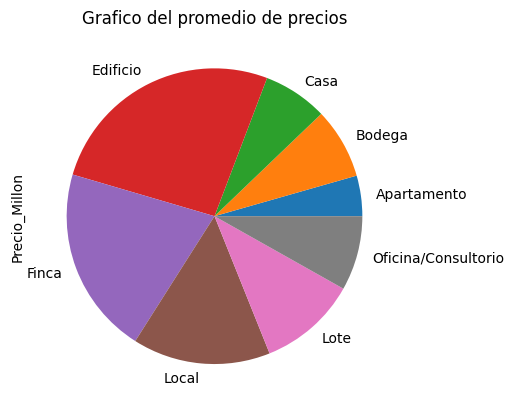

In [ ]:
#muestro en un grafico el promedio del precio de los tipos de inmuebles a la venta
dataset.groupby('Tipo').Precio_Millon.mean().plot(kind='pie',title="Grafico del promedio de precios");

In [ ]:

import seaborn as sns

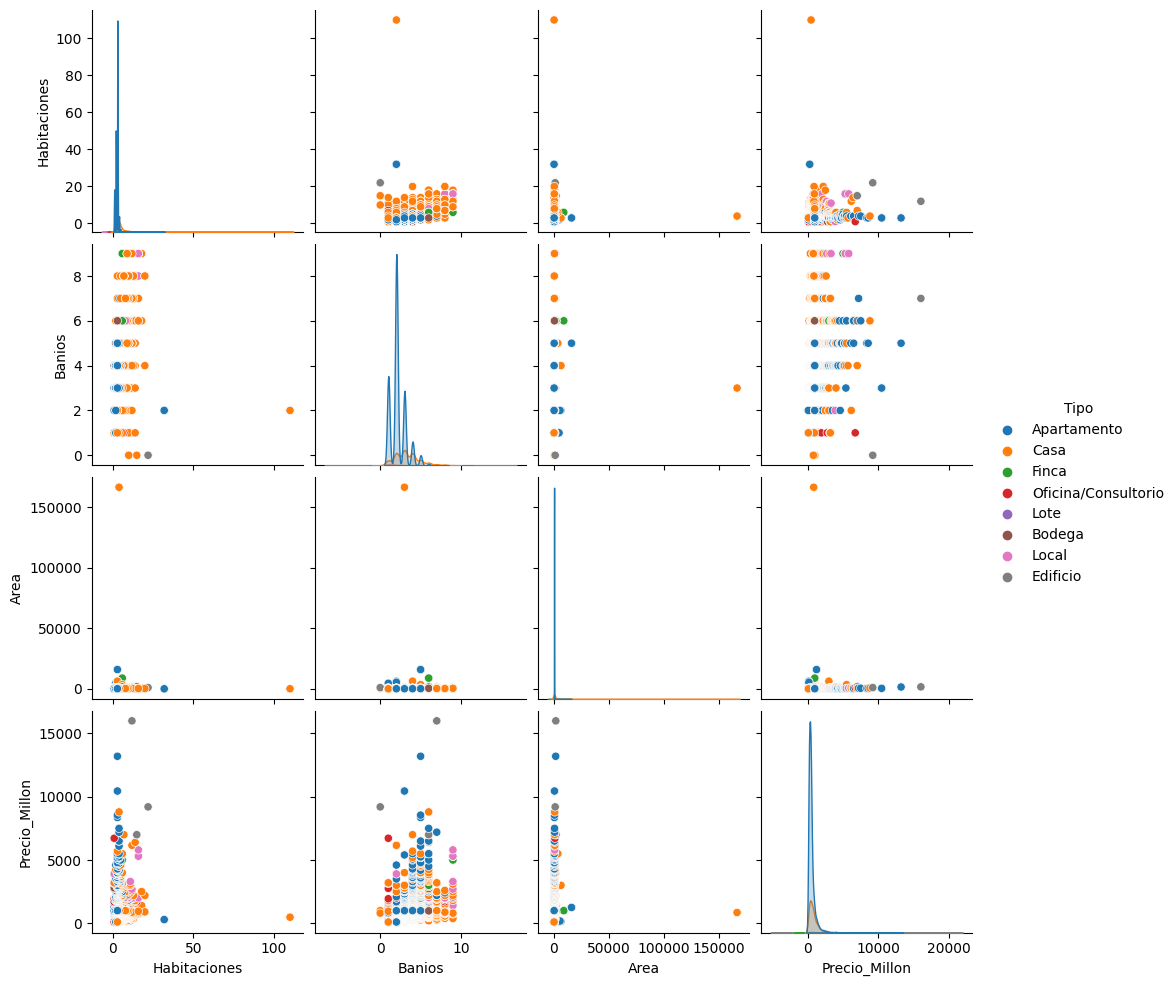

In [ ]:
#para visualizar como se relacionan todas las variables numericas respecto al tipo de inmuebles
sns.pairplot(data=dataset,hue='Tipo')